# Preprocessing

데이터 불러오기

In [60]:
import pandas as pd

train = pd.read_csv('../data/따릉이/train.csv')
test = pd.read_csv('../data/따릉이/test.csv')

#### 결측치 처리 - 평균 : `mean`
1. 결측치가 있는 피쳐 탐색(체크)
2. 결측치를 각 피쳐의 평균값으로 대체

In [61]:
# 1
print('[ Train data\' NaN ]')
print(train.isnull().sum())

print('[ Test data\' NaN ]')
print(test.isnull().sum())

[ Train data' NaN ]
id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64
[ Test data' NaN ]
id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64


In [62]:
# 2
# NaN 존재 - train feature : 8개, test는 나중에 처리하나?
train.fillna({'hour_bef_temperature':int(train['hour_bef_temperature'].mean())}, inplace=True)
train.fillna({'hour_bef_precipitation':int(train['hour_bef_precipitation'].mean())}, inplace=True)
train.fillna({'hour_bef_windspeed':int(train['hour_bef_windspeed'].mean())}, inplace=True)
train.fillna({'hour_bef_humidity':int(train['hour_bef_humidity'].mean())}, inplace=True)
train.fillna({'hour_bef_visibility':int(train['hour_bef_visibility'].mean())}, inplace=True)
train.fillna({'hour_bef_ozone':int(train['hour_bef_ozone'].mean())}, inplace=True)
train.fillna({'hour_bef_pm10':int(train['hour_bef_pm10'].mean())}, inplace=True)
train.fillna({'hour_bef_pm2.5':int(train['hour_bef_pm2.5'].mean())}, inplace=True)


In [63]:
# 결과 확인
print(train.isnull().sum())

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64


In [64]:
# NaN 존재 - test feature : 8개
test.fillna({'hour_bef_temperature':int(test['hour_bef_temperature'].mean())}, inplace=True)
test.fillna({'hour_bef_precipitation':int(test['hour_bef_precipitation'].mean())}, inplace=True)
test.fillna({'hour_bef_windspeed':int(test['hour_bef_windspeed'].mean())}, inplace=True)
test.fillna({'hour_bef_humidity':int(test['hour_bef_humidity'].mean())}, inplace=True)
test.fillna({'hour_bef_visibility':int(test['hour_bef_visibility'].mean())}, inplace=True)
test.fillna({'hour_bef_ozone':int(test['hour_bef_ozone'].mean())}, inplace=True)
test.fillna({'hour_bef_pm10':int(test['hour_bef_pm10'].mean())}, inplace=True)
test.fillna({'hour_bef_pm2.5':int(test['hour_bef_pm2.5'].mean())}, inplace=True)


In [65]:
print(test.isnull().sum())

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64


#### 결측치 처리 - 보간법 : `interpolate`
0. `보간법` - 각 피쳐의 `정보성을 강조`
    - 따릉이 데이터' 피쳐 : 기상정보(시간순)
    - sol. 결측치 바로 전후 데이터의 평균으로 보간
    
    
1. 결측치가 있는 피쳐 탐색(체크)
2. 결측치를 보간법으로 대체

In [66]:
# init
train = pd.read_csv('../data/따릉이/train.csv')
test = pd.read_csv('../data/따릉이/test.csv')

# 1
print(train.isnull().sum())
print()
print(test.isnull().sum())

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64


In [67]:
# 2: 결측치 이전 행과 다음 행의 평균으로 대체 보간하기
train.interpolate(inplace=True)
test.interpolate(inplace=True)

In [68]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64


# Modeling

### **Ensemble - RandomForest**

여러 개의 의사결정트리를 만들고 이들의 평균으로 예측의 성능을 높이는 방법

하나의 데이터 - 여러 개의 렌덤 데이터셋 추출 + 모델 생성 가능

In [69]:
# Model Declaration

from sklearn.ensemble import RandomForestRegressor
#model = RandomForestRegressor()

#### Training - **모델 평가** 척도 : `criterion`
`RMSE` : `MSE`(평균제곱오차)에 `루트`를 씌운 것
  - `criterion= 'mse'`로 구현 가능

In [70]:
# Set Dataset

X_train = train.drop(['count'], axis=1)
Y_train = train['count']


# Training

model = RandomForestRegressor(criterion= 'mse') #RMSE
model.fit(X_train, Y_train)

RandomForestRegressor()

# Tuning

### **Feature Engineering**
`데이터의 숨겨진 특성을 발굴`해내기 위해 설명변수(피쳐)들을 분석하기 좋은 형태로 가공하는 작업

- e.g. 변수에 로그 | 제곱 | 변수 정규화(Nomalization) | ... 

#### 변수의 중요도 파악 : `feature_importances_`
변수의 중요도 : 예측변수(설명변수)를 결정할 때 `긱 피쳐가 얼마나 중요한 역할`을 하는지
- tip) 모델 성능 향상 : 변수의 중요도 ⬇ 피쳐 제거하기 

In [71]:
model.feature_importances_ # 모델 예측변수의 중요도

array([0.02662188, 0.59588397, 0.17659072, 0.01740592, 0.02558287,
       0.03752433, 0.03511734, 0.03369762, 0.03195103, 0.01962431])

#### 변수(피쳐) 제거
모델의 성능을 향상시키기 위해 변수 중요도가 낮은, 의미 없는 피쳐를 파악, 제거 후 훈련과 예측을 진행

0. 피쳐의 경우의 수에 따라 3가지 dataset(train, test) 생성

1. 각 경우에 따른 모델로 예측하기

In [72]:
# init
train = pd.read_csv('../data/따릉이/train.csv')
test = pd.read_csv('../data/따릉이/test.csv')

In [73]:
# 결측치 전처리
train.interpolate(inplace=True)
test.interpolate(inplace=True)

In [74]:
# 피쳐를 drop한 3개의 train set 생성

X_train_1 = train.drop(['count', 'id'], axis=1)
X_train_2 = train.drop(['count', 'id', 'hour_bef_windspeed'], axis=1)
X_train_3 = train.drop(['count', 'id', 'hour_bef_windspeed', 'hour_bef_pm2.5'], axis=1)

# train set에 맞게 test set도 피쳐 drop 후 생성

test_1 = test.drop(['id'], axis=1)
test_2 = test.drop(['id', 'hour_bef_windspeed'], axis=1)
test_3 = test.drop(['id', 'hour_bef_windspeed', 'hour_bef_pm2.5'], axis=1)

In [75]:
# Models Training

model_input_var1 = RandomForestRegressor(criterion='mse')
model_input_var1.fit(X_train_1, Y_train)

model_input_var2 = RandomForestRegressor(criterion='mse')
model_input_var2.fit(X_train_2, Y_train)

model_input_var3 = RandomForestRegressor(criterion='mse')
model_input_var3.fit(X_train_3, Y_train)

RandomForestRegressor()

In [76]:
# Predict Test set

y_pred_1 = model_input_var1.predict(test_1)
y_pred_2 = model_input_var2.predict(test_2)
y_pred_3 = model_input_var3.predict(test_3)

In [77]:
# Result submission

submission_1 = pd.read_csv('../data/따릉이/submission.csv')
submission_2 = pd.read_csv('../data/따릉이/submission.csv')
submission_3 = pd.read_csv('../data/따릉이/submission.csv')

submission_1['count'] = y_pred_1
submission_2['count'] = y_pred_2
submission_3['count'] = y_pred_3

#submission_1.to_csv('sub_1.csv',index=False)
#submission_2.to_csv('sub_2.csv',index=False)
#submission_3.to_csv('sub_3.csv',index=False)

#### Submission data
(sample)
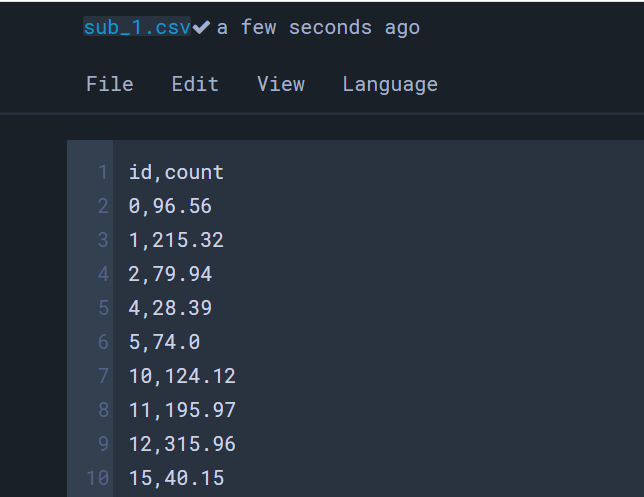

### **HyperParameter Tuning**

`정지규칙`들을 종합적으로 고려하여 *최적의 조건값* 을 설정하는 것
<br><br>

- **최대 깊이(max_depth)** : root 노드로부터 최대로 내려갈 수 있는 깊이
  - 작을수록 트리는 작아짐
 
- **최소 노드크기(min_samples_split)** : 노드를 분할하기 위한 데이터 수
  - 작을수록 트리는 커짐
  
- **최소 향상도(min_impurity_decrease)** : 노드를 분할 하기 위한 최소 향상도. *향상도가 설정값 이하 > 분할 멈춤*
  - 작을수록 트리는 커짐
  
- **비용 복잡도(Cost-complexity)** : 트리가 커지는 것에 대해 **패널티 계수**를 설정 > **불순도 & 복잡도** 계산 

### HyperParameter Tuning - **GridSearch**

- 하이퍼파라미터 튜닝 방법론 중 성능 Best
- *완전탐색(Exhaustive Search)*을 사용
- 가능한 모든 조합 중 best 조합을 찾아줌
  - (단점) 완전탐색이기에 best를 찾기까지 시간이 오래 걸림

In [79]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(criterion = 'mse', random_state=2020)

params = {'n_estimators': [200, 300, 500],
          'max_features': [5, 6, 8],
          'min_samples_leaf': [1, 3, 5]}

greedy_CV = GridSearchCV(model, param_grid=params, cv = 3, n_jobs = -1)
greedy_CV.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=2020),
             n_jobs=-1,
             param_grid={'max_features': [5, 6, 8],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [200, 300, 500]})

In [80]:
pred = greedy_CV.predict(test)

pred

array([ 98.2096086 , 219.56942193,  79.55960615,  42.45692629,
        58.30486392, 128.80483538, 192.5235082 , 293.74524871,
        41.61470815, 110.82005016, 299.65255831, 251.45269998,
       108.02500782,  43.80077573, 201.53157912, 161.17019805,
        25.26753403, 178.62625389, 327.58199014, 162.13943663,
       232.61158011,  81.12243977,  30.00139691, 140.52185454,
       139.41846753, 114.47330363,  26.48873329, 120.80212807,
       114.07323016, 159.43079647,  82.01214334,  40.45128678,
        66.29257155, 129.96711484, 277.92944208,  40.14311712,
       134.36958668, 117.57202501, 225.60856668,  85.28241007,
        59.38148031, 122.77523341, 169.98789946,  80.12606825,
       321.01760867, 188.70778622,  88.67695961,  63.10269096,
        21.55733771,  89.84926431, 248.55496642,  94.11972066,
       143.42935269,  81.08390931, 201.26205712, 150.92577552,
        50.57824471, 184.3272286 ,  29.43277822,  19.47562297,
        96.77822777,  85.50351067, 255.50734634, 294.43

In [81]:
submission = pd.read_csv('../data/따릉이/submission.csv')

In [82]:
import numpy as np

submission['count'] = np.round(pred, 2)

submission.head()

,id,count
0,0,98.21
1,1,219.57
2,2,79.56
3,4,42.46
4,5,58.30


In [83]:
submission.to_csv('gridSearch-sub.csv', index=False)